## 2.2.1 ゴールデンクロスとデッドクロス

### コード2.8 銘柄 A0001 の 2012年〜13 年のデータを選択する

In [1]:
import os
import pandas as pd
os.makedirs('./output', exist_ok=True)

# 日次株価データを読み込み
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')
stockDaily = stockDaily.set_index('date').sort_index()

# 銘柄A0001のデータを選択する。
df = stockDaily[stockDaily['ticker'] == 'A0001']

# 日付を行ラベルに設定: plotしたときに横軸目盛りになる
# 日付をラベルスライサで選択
df = df.loc['2012-01-01': '2013-12-31']
print(df)

           ticker  open  high   low  close   volume     share     return  \
date                                                                       
2012-01-04  A0001  1683  1683  1683   1683    89264  18179794  -0.118694   
2012-01-05  A0001  1604  1666  1534   1666   100683  18179794  -1.010101   
2012-01-06  A0001  1630  1708  1630   1655    42017  18179794  -0.660264   
2012-01-10  A0001  1668  1668  1668   1668    37014  18179794   0.785498   
2012-01-11  A0001  1724  1724  1667   1667    61042  18179794  -0.059952   
...           ...   ...   ...   ...    ...      ...       ...        ...   
2013-12-24  A0001  1167  1218  1141   1191  2054917  14698572 -10.786520   
2013-12-25  A0001  1193  1199  1193   1195    74151  14698572   0.335852   
2013-12-26  A0001  1168  1213  1168   1208   526850  14698572   1.087866   
2013-12-27  A0001  1166  1196  1164   1196   305329  14698572  -0.993377   
2013-12-30  A0001  1179  1209  1147   1195   182782  14698572  -0.083612   

           

### コード2.9 Series で移動平均を計算しチャートを描画する

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


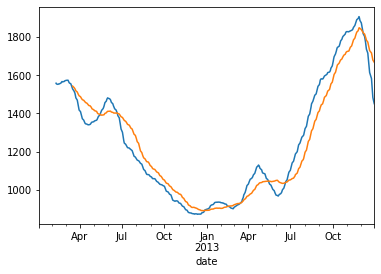

In [2]:
# 26日移動平均、52日移動平均
ma26 = df['close'].rolling(26).mean()
ma52 = df['close'].rolling(52).mean()

# Seriesのplot()メソッドを複数実行すれば重ねて描画されていく
ax = ma26.plot()
ax = ma52.plot(ax=ax)

# 画像ファイル(png)として保存
ax.get_figure().savefig('./output/ma26_52.png')
import matplotlib.pyplot as plt
plt.savefig('xxa.png')

### コード2.10 Series で移動平均を計算しチャートを描画する

            close         ma26         ma52    SgL
date                                              
2012-05-10   1516  1379.000000  1398.153846  False
2012-05-11   1468  1384.576923  1396.826923  False
2012-05-14   1464  1390.307692  1394.903846  False
2012-05-15   1495  1397.884615  1393.961538   True
2012-05-16   1460  1404.346154  1392.269231   True
2012-05-17   1496  1410.653846  1391.269231   True
            close         ma26         ma52    SgL
date                                              
2012-06-18   1308  1418.000000  1401.288462   True
2012-06-19   1324  1412.615385  1401.461538   True
2012-06-20   1331  1406.307692  1402.096154   True
2012-06-21   1250  1398.230769  1401.288462  False
2012-06-22   1231  1388.038462  1399.346154  False
2012-06-25   1196  1376.615385  1396.538462  False


,close,ma26,ma52,SgL
date,,,,
2012-05-10,1516,1379.000000,1398.153846,False
2012-05-11,1468,1384.576923,1396.826923,False
2012-05-14,1464,1390.307692,1394.903846,False
2012-05-15,1495,1397.884615,1393.961538,True
2012-05-16,1460,1404.346154,1392.269231,True
2012-05-17,1496,1410.653846,1391.269231,True


,close,ma26,ma52,SgL
date,,,,
2012-06-18,1308,1418.000000,1401.288462,True
2012-06-19,1324,1412.615385,1401.461538,True
2012-06-20,1331,1406.307692,1402.096154,True
2012-06-21,1250,1398.230769,1401.288462,False
2012-06-22,1231,1388.038462,1399.346154,False
2012-06-25,1196,1376.615385,1396.538462,False


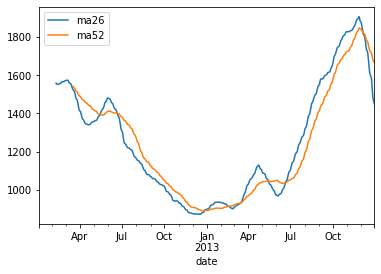

In [3]:
# close列からのみなるDataFrameを実体をコピーして作成
ma = df[['close']].copy()
# 移動平均の計算結果を同じDataFrameの列として追加する
ma['ma26'] = ma['close'].rolling(26).mean()
ma['ma52'] = ma['close'].rolling(52).mean()
# 短期(26日)移動平均が中長期(52日)移動平均を上回ったかどうか
ma['SgL'] = ma['ma26'] > ma['ma52']  # short term MA greater than long term MA
# ２つの移動平均の列を選択してチャートを描画
ma[['ma26', 'ma52']].plot()
# ゴールデンクロスとデッドクロスが起こる期間の内容を表示
print(ma.iloc[86:92])
print(ma.iloc[113:119])